In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Data Loading

In [2]:
data = pd.read_csv("E:/Time_series_prediction/churn_prediction_project/UserBehavior.csv")
# data.head()

In [3]:
data.columns = ["User ID", "commodity ID", "Item ID", "Behavior Type", "Timestamp"]


In [4]:
# Randomly pick 987,994 samples
data = data.sample(n=987994, random_state=42)


In [9]:
list(data["Timestamp"]).sort()
list(data["Item ID"]).sort()
list(data["commodity ID"]).sort()
list(data["User ID"]).sort()

In [5]:
len(data)

987994

In [10]:
data.head(10)

,User ID,commodity ID,Item ID,Behavior Type,Timestamp
43314727,237858,1481482,2733371,pv,1512225772
88035904,44200,3916487,4135836,pv,1511931558
38200464,920479,1955086,2355072,pv,1512313496
83578910,239462,2698818,154040,pv,1511783539
78996463,947273,3511372,1029459,pv,1512273859
29809992,531875,4416644,570735,cart,1512126241
22360399,193305,2820475,2355072,pv,1511876646
6969307,398878,655683,982926,pv,1512032649
61632517,159260,4041058,1320293,pv,1512303313
457271,104420,2406829,3324385,pv,1511987128


# Pre-Processing 

In [11]:
import datetime

# Assuming you have a POSIXct time object called `posix_time`
# Convert to datetime object
year=[]
month =[]
day =[]
hour =[]
minute =[]
second =[]
batch_size =1
for i in range(0,len(data) , batch_size):
    # Extract year, month, day, hour, minute, and second
    if data["Timestamp"].values[i*batch_size] < 0:
        raise ValueError("Timestamp cannot be negative")

    year.append(datetime.datetime.fromtimestamp(data["Timestamp"].values[i*batch_size]).year)
    month.append(datetime.datetime.fromtimestamp(data["Timestamp"].values[i*batch_size]).month)
    day.append(datetime.datetime.fromtimestamp(data["Timestamp"].values[i*batch_size]).day)
    hour.append(datetime.datetime.fromtimestamp(data["Timestamp"].values[i*batch_size]).hour)
    minute.append(datetime.datetime.fromtimestamp(data["Timestamp"].values[i*batch_size]).minute)
    second.append(datetime.datetime.fromtimestamp(data["Timestamp"].values[i*batch_size]).second)



In [12]:
# get datetime_list
datetime_list = [f"{y}-{m}-{d} {h}:{min}:{s}" for y, m, d, h, min, s in zip(year, month, day, hour, minute, second)]

In [13]:
# now our data contain 5896222 samples with standard time format as paper mentioned
data_paper = data
data_paper["Timestamp"] = datetime_list
data_paper.head(10)

,User ID,commodity ID,Item ID,Behavior Type,Timestamp
43314727,237858,1481482,2733371,pv,2017-12-2 18:12:52
88035904,44200,3916487,4135836,pv,2017-11-29 8:29:18
38200464,920479,1955086,2355072,pv,2017-12-3 18:34:56
83578910,239462,2698818,154040,pv,2017-11-27 15:22:19
78996463,947273,3511372,1029459,pv,2017-12-3 7:34:19
29809992,531875,4416644,570735,cart,2017-12-1 14:34:1
22360399,193305,2820475,2355072,pv,2017-11-28 17:14:6
6969307,398878,655683,982926,pv,2017-11-30 12:34:9
61632517,159260,4041058,1320293,pv,2017-12-3 15:45:13
457271,104420,2406829,3324385,pv,2017-11-29 23:55:28


In [40]:
# a = int(data_paper["Timestamp"].values[0][-8:-2].split(":")[0])
# b = int(data_paper["Timestamp"].values[0][-8:-2].split(":")[1])
# print(len(str(a)))
# if len(str(a))<2:
#     a="0"+str(a)
# else:
#     a=str(a)
# c= str(a)+str(b)
# print(c)
# print(len(c))

1
0145
4


In [31]:
# digits = tuple(map(int, str(145)))
# print(digits)  # Output: (1, 4, 5)


(1, 4, 5)


# some explanations about dataset 

It is not explicitly stated in the given subsection whether timeID, commodityID, and UserID are useless for churn prediction. However, the subsection does mention that the proposed model for churn prediction is based on customer segmentation using the k-means algorithm and support vector machine (SVM) prediction. The method divides customers into three categories and determines the core customer groups. The SVM and logistic regression were compared to predict customer churn. The results show that each prediction index after customer segmentation was significantly improved, which proves that k-means clustering segmentation is necessary. Therefore, it is possible that timeID, commodityID, and UserID may not be directly used in the churn prediction model, but it is not explicitly stated that they are useless.

In [14]:
# Location of General features
pv_loc = np.where(data_paper["Behavior Type"]=="pv")
fav_loc = np.where(data_paper["Behavior Type"]=="fav")
buy_loc = np.where(data_paper["Behavior Type"]=="buy")
cart_loc = np.where(data_paper["Behavior Type"]=="cart")
category_loc = np.where(data_paper["Behavior Type"].iloc[i]=="categories")
print(pv_loc , len(pv_loc[0]))
print(fav_loc , len(fav_loc[0]))
print(buy_loc , len(buy_loc[0]))
print(cart_loc, len(cart_loc[0]))
print(category_loc , len(category_loc[0]))

(array([], dtype=int64),) 0
(array([], dtype=int64),) 0
(array([], dtype=int64),) 0
(array([], dtype=int64),) 0
(array([], dtype=int64),) 0


In [57]:
for i in fav_loc[0]:
    print(i)

77
92
135
194
202
220
289
316
346
371
422
474
476
534
564
578
593
610
615
633
682
704
714
757
779
808
873
884
903
911
1050
1063
1140
1178
1234
1294
1327
1336
1360
1381
1425
1520
1537
1539
1656
1674
1725
1763
1836
1880
1898
1916
1946
2048
2082
2088
2216
2401
2418
2448
2458
2535
2744
2749
2808
2885
2979
3005
3024
3091
3138
3140
3170
3174
3209
3276
3305
3424
3425
3480
3501
3653
3688
3750
3756
3792
3814
3886
3888
3889
3899
3905
3911
3933
3936
3961
3962
4037
4052
4069
4101
4108
4115
4129
4138
4342
4357
4403
4409
4430
4440
4453
4500
4515
4530
4534
4554
4578
4596
4601
4621
4636
4709
4712
4714
4760
4854
4871
4877
4883
4908
4971
5008
5061
5077
5089
5136
5149
5154
5198
5229
5234
5279
5282
5285
5287
5315
5323
5343
5361
5371
5486
5519
5625
5631
5693
5752
5770
5777
5806
5928
5956
5976
6036
6038
6054
6074
6093
6104
6177
6183
6229
6295
6307
6317
6395
6417
6443
6462
6473
6557
6567
6572
6579
6678
6753
6812
6818
6925
6950
7036
7049
7092
7097
7102
7131
7191
7199
7203
7212
7304
7315
7325
7336
7397
7464
74

In [9]:
data_paper["Timestamp"][0][10:]
print(int(" 1"))

1


In [48]:
# ouyliers
# Delete the row with all features
# data_paper = data_paper.drop(index=19102623)

In [10]:
from datetime import datetime, time
considered_time =[]
for i in range(0,len(data_paper["Timestamp"])):
    try:
        a = int(data_paper["Timestamp"].values[i][10:].split(":")[0])
        b = int(data_paper["Timestamp"].values[i][10:].split(":")[1])
    except ValueError:
        try:
            a = int(data_paper["Timestamp"].values[i][9:].split(":")[0])
            b = int(data_paper["Timestamp"].values[i][9:].split(":")[1])
        except ValueError:
            print("Error: Invalid literal for int() with base 10")
            continue
        
        if len(str(a))<2:
            a="0"+str(a)
        else:
            a=str(a)
        c= str(a)+str(b)
        
    else:
        if len(str(a))<2:
            a="0"+str(a)
        else:
            a=str(a)
        c= str(a)+str(b)
    
    t = time(int(c[0:2]),int(c[2:]),0)
    considered_time.append(t)


In [36]:
len(considered_time) , considered_time[0:10] , time(0, 0, 0)

(987994,
 [datetime.time(18, 12),
  datetime.time(8, 29),
  datetime.time(18, 34),
  datetime.time(15, 22),
  datetime.time(7, 34),
  datetime.time(14, 34),
  datetime.time(17, 14),
  datetime.time(12, 34),
  datetime.time(15, 45),
  datetime.time(23, 55)],
 datetime.time(0, 0))

In [14]:
# Define the start and end times for each behavior type
behavior_types = {
    "Daybreak PV": (time(0, 0, 0), time(6, 0, 0)),
    "AM PV": (time(6, 0, 0), time(12, 0, 0)),
    "PM PV": (time(12, 0, 0), time(18, 0, 0)),
    "Night PV": (time(18, 0, 0), time(23, 59, 0)),
    "Daybreak Buy": (time(0, 0, 0), time(6, 0, 0)),
    "AM Buy": (time(6, 0, 0), time(12, 0, 0)),
    "PM Buy": (time(12, 0, 0), time(18, 0, 0)),
    "Night Buy": (time(18, 0, 0), time(23, 59, 0)),
    "Daybreak Cart": (time(0, 0, 0), time(6, 0, 0)),
    "AM Cart": (time(6, 0, 0), time(12, 0, 0)),
    "PM Cart": (time(12, 0, 0), time(18, 0, 0)),
    "Night Cart": (time(18, 0, 0), time(23, 59, 0)),
    "Daybreak Fav": (time(0, 0, 0), time(6, 0, 0)),
    "AM Fav": (time(6, 0, 0), time(12, 0, 0)),
    "PM Fav": (time(12, 0, 0), time(18, 0, 0)),
    "Night Fav": (time(18, 0, 0), time(23, 59, 0))
}


In [39]:
behavior_types.items()

dict_items([('Daybreak PV', (datetime.time(0, 0), datetime.time(6, 0))), ('AM PV', (datetime.time(6, 0), datetime.time(12, 0))), ('PM PV', (datetime.time(12, 0), datetime.time(18, 0))), ('Night PV', (datetime.time(18, 0), datetime.time(23, 59))), ('Daybreak Buy', (datetime.time(0, 0), datetime.time(6, 0))), ('AM Buy', (datetime.time(6, 0), datetime.time(12, 0))), ('PM Buy', (datetime.time(12, 0), datetime.time(18, 0))), ('Night Buy', (datetime.time(18, 0), datetime.time(23, 59))), ('Daybreak Cart', (datetime.time(0, 0), datetime.time(6, 0))), ('AM Cart', (datetime.time(6, 0), datetime.time(12, 0))), ('PM Cart', (datetime.time(12, 0), datetime.time(18, 0))), ('Night Cart', (datetime.time(18, 0), datetime.time(23, 59))), ('Daybreak Fav', (datetime.time(0, 0), datetime.time(6, 0))), ('AM Fav', (datetime.time(6, 0), datetime.time(12, 0))), ('PM Fav', (datetime.time(12, 0), datetime.time(18, 0))), ('Night Fav', (datetime.time(18, 0), datetime.time(23, 59)))])

In [11]:

# DayBreak
start_time_1=time(0, 0, 0)
end_time_1 = time(6, 0, 0)
# AM
start_time_2=time(6, 0, 0)
end_time_2 = time(12, 0, 0)
# PM
start_time_3=time(12, 0, 0)
end_time_3 = time(18, 0, 0)
# Night
start_time_4=time(18, 0, 0)
end_time_4 = time(23, 59, 0)

for i in range(0,len(considered_time)):
    
# compare the current time with the start and end time
#           Day break
    if start_time_1 <= considered_time[i] <= end_time_1 and data_paper["Behavior Type"].iloc[i]=="pv":
        data_paper["Behavior Type"].iloc[i]="Daybreak PV"
    if start_time_1 <= considered_time[i] <= end_time_1 and data_paper["Behavior Type"].iloc[i]=="fav":
        data_paper["Behavior Type"].iloc[i]="Daybreak fav"
    if start_time_1 <= considered_time[i] <= end_time_1 and data_paper["Behavior Type"].iloc[i]=="buy":
         data_paper["Behavior Type"].iloc[i]="Daybreak buy"  
    if  start_time_1 <= considered_time[i] <= end_time_1 and data_paper["Behavior Type"].iloc[i]=="cart":
        data_paper["Behavior Type"].iloc[i]="Daybreak cart"
        
            
    if start_time_2 <= considered_time[i] <= end_time_2 and data_paper["Behavior Type"].iloc[i]=="pv":
        data_paper["Behavior Type"].iloc[i]="AM PV"
    if start_time_2 <= considered_time[i] <= end_time_2 and data_paper["Behavior Type"].iloc[i]=="fav":
        data_paper["Behavior Type"].iloc[i]="AM fav"
    if start_time_2 <= considered_time[i] <= end_time_2 and data_paper["Behavior Type"].iloc[i]=="buy":
         data_paper["Behavior Type"].iloc[i]="AM buy"  
    if  start_time_2 <= considered_time[i] <= end_time_2 and data_paper["Behavior Type"].iloc[i]=="cart":
        data_paper["Behavior Type"].iloc[i]="AM cart" 
        
    if start_time_3 <= considered_time[i] <= end_time_3 and data_paper["Behavior Type"].iloc[i]=="pv":
        data_paper["Behavior Type"].iloc[i]="PM PV"
    if start_time_3 <= considered_time[i] <= end_time_3 and data_paper["Behavior Type"].iloc[i]=="fav":
        data_paper["Behavior Type"].iloc[i]="PM fav"
    if start_time_3 <= considered_time[i] <= end_time_3 and data_paper["Behavior Type"].iloc[i]=="buy":
         data_paper["Behavior Type"].iloc[i]="PM buy"  
    if  start_time_3 <= considered_time[i] <= end_time_3 and data_paper["Behavior Type"].iloc[i]=="cart":
        data_paper["Behavior Type"].iloc[i]="PM cart"
        
    if start_time_4 <= considered_time[i] <= end_time_4 and data_paper["Behavior Type"].iloc[i]=="pv":
        data_paper["Behavior Type"].iloc[i]="Night PV"
    if start_time_4 <= considered_time[i] <= end_time_4 and data_paper["Behavior Type"].iloc[i]=="fav":
        data_paper["Behavior Type"].iloc[i]="Night fav"
    if start_time_4 <= considered_time[i] <= end_time_4 and data_paper["Behavior Type"].iloc[i]=="buy":
         data_paper["Behavior Type"].iloc[i]="Night buy"  
    if  start_time_4 <= considered_time[i] <= end_time_4 and data_paper["Behavior Type"].iloc[i]=="cart":
        data_paper["Behavior Type"].iloc[i]="Night cart"
    else:
        continue
    

C:\Users\Alireza\AppData\Local\Temp\ipykernel_13212\2796625154.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_paper["Behavior Type"].iloc[i]="Night PV"
C:\Users\Alireza\AppData\Local\Temp\ipykernel_13212\2796625154.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_paper["Behavior Type"].iloc[i]="AM PV"
C:\Users\Alireza\AppData\Local\Temp\ipykernel_13212\2796625154.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [12]:
data_paper.head(10)

,User ID,commodity ID,Item ID,Behavior Type,Timestamp
43314727,237858,1481482,2733371,Night PV,2017-12-2 18:12:52
88035904,44200,3916487,4135836,AM PV,2017-11-29 8:29:18
38200464,920479,1955086,2355072,Night PV,2017-12-3 18:34:56
83578910,239462,2698818,154040,PM PV,2017-11-27 15:22:19
78996463,947273,3511372,1029459,AM PV,2017-12-3 7:34:19
29809992,531875,4416644,570735,PM cart,2017-12-1 14:34:1
22360399,193305,2820475,2355072,PM PV,2017-11-28 17:14:6
6969307,398878,655683,982926,PM PV,2017-11-30 12:34:9
61632517,159260,4041058,1320293,PM PV,2017-12-3 15:45:13
457271,104420,2406829,3324385,Night PV,2017-11-29 23:55:28


In [3]:
data_paper.to_excel("E:/Time_series_prediction/churn_prediction_project/data_paper.xlsx")

NameError: name 'data_paper' is not defined

# Draft

In [5]:
Data["Behavior Type"].unique() , type(Data["Timestamp"][0]) , Data.tail()

array(['Night PV', 'AM PV', 'PM PV', 'PM cart', 'Daybreak PV',
       'Night cart', 'AM cart', 'Daybreak fav', 'Night fav', 'PM buy',
       'AM fav', 'AM buy', 'Daybreak cart', 'Daybreak buy', 'PM fav',
       'Night buy'], dtype=object)

In [ ]:
# Sort Data based sorted_datetimes
# Data["Timestamp"] = sorted_datetimes
# sorted_behavior_type = Data.loc[Data['Timestamp'].isin(sorted_datetimes), 'Behavior Type']
# sorted_item_id = Data.loc[Data['Timestamp'].isin(sorted_datetimes), 'Item ID']
# sorted_commodity_id = Data.loc[Data['Timestamp'].isin(sorted_datetimes), 'commodity ID']
# sorted_user_id = Data.loc[Data['Timestamp'].isin(sorted_datetimes), 'User ID']


In [ ]:
# # Check for missing values in sorted_data
# print(sorted_data.isnull())

# # Check for duplicate rows in sorted_data
# print(sorted_data.duplicated().sum())


# Part 2

In [2]:
Data = pd.read_excel("E:/Time_series_prediction/churn_prediction_project/data_paper.xlsx")

In [3]:
Data.head(10)

,Unnamed: 0,User ID,commodity ID,Item ID,Behavior Type,Timestamp
0,43314727,237858,1481482,2733371,Night PV,2017-12-2 18:12:52
1,88035904,44200,3916487,4135836,AM PV,2017-11-29 8:29:18
2,38200464,920479,1955086,2355072,Night PV,2017-12-3 18:34:56
3,83578910,239462,2698818,154040,PM PV,2017-11-27 15:22:19
4,78996463,947273,3511372,1029459,AM PV,2017-12-3 7:34:19
5,29809992,531875,4416644,570735,PM cart,2017-12-1 14:34:1
6,22360399,193305,2820475,2355072,PM PV,2017-11-28 17:14:6
7,6969307,398878,655683,982926,PM PV,2017-11-30 12:34:9
8,61632517,159260,4041058,1320293,PM PV,2017-12-3 15:45:13
9,457271,104420,2406829,3324385,Night PV,2017-11-29 23:55:28


In [4]:
from datetime import datetime
# Str into date-time format
date_object=[]
for i in range(0,len(Data["Timestamp"])):
    date_string = Data["Timestamp"][i]
    date_object.append(datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S'))
# important about new timestampt without any outliers
for i in Data.index:
    if not datetime(2017, 11, 23) <= date_object[i] <= datetime(2017, 12, 4):
        Data.drop(i, inplace=True)
len(Data)

987884

In [5]:
sorted_data = Data.sort_values(by=['Timestamp'])
sorted_data.head(10)

,Unnamed: 0,User ID,commodity ID,Item ID,Behavior Type,Timestamp
18093,62263103,187465,991799,4284875,AM PV,2017-11-23 10:57:42
713492,87002606,396139,2764406,2465336,AM PV,2017-11-23 10:8:24
254430,68493249,467416,851631,3733874,AM PV,2017-11-23 11:16:0
293790,56944961,863036,1910706,1516409,AM PV,2017-11-23 11:19:52
675162,90994438,577260,3374743,4915680,AM PV,2017-11-23 11:26:37
418585,23781594,257186,549819,3738615,AM PV,2017-11-23 11:34:5
38350,65713774,342247,4240338,3435808,PM PV,2017-11-23 12:45:54
902975,12525552,653624,4211684,5071267,PM PV,2017-11-23 13:26:42
741173,19670712,987211,1473203,411153,PM PV,2017-11-23 13:45:10
841223,74953264,760487,1550635,3745824,PM PV,2017-11-23 14:21:10


In [6]:
# assuming the list of datetime is stored in a variable named "datetime_list"
# filter the datetime values between 23 November 2017 and 4 December 2017
filtered_datetime_list = [dt for dt in date_object if datetime(2017, 11, 23) <= dt <= datetime(2017, 12, 4)]

# determine the first and last day
first_day = min(filtered_datetime_list).strftime('%Y-%m-%d')
last_day = max(filtered_datetime_list).strftime('%Y-%m-%d')

sorted_datetimes = sorted(filtered_datetime_list)

print(len(sorted_datetimes))

first_day = sorted_datetimes[0].date()
last_day = sorted_datetimes[-1].date()

print("First day:", first_day)
print("Last day:", last_day) 

987884
First day: 2017-11-23
Last day: 2017-12-03


In [7]:
# Extract observation and verification at first six days and at last 5 days respectively.
# Extract data for first 6 days(observation)
first_6_days = sorted_data.loc[(sorted_data['Timestamp'] < '2017-11-28')]

# Extract data for last 5 days(verification)
last_5_days = sorted_data.loc[(sorted_data['Timestamp'] >= '2017-11-28')]

In [10]:
len(first_6_days) +len(last_5_days) , len(first_6_days) ,len(last_5_days)

(987884, 314217, 673667)

In [29]:
# based on the user ID
sorted_data['Churn'] = sorted_data['User ID'].isin(first_6_days['User ID']) & sorted_data['User ID'].isin(last_5_days['User ID'])


In [31]:
# instead of ture and false I need 0 and 1 
le = LabelEncoder()

sorted_data['Churn'] = le.fit_transform(sorted_data['Churn'])

In [33]:
sorted_data['Churn'] = 1 - sorted_data['Churn'].astype(int)
sorted_data.head(20)

,Unnamed: 0,User ID,commodity ID,Item ID,Behavior Type,Timestamp,Churn
18093,62263103,187465,991799,4284875,AM PV,2017-11-23 10:57:42,0
713492,87002606,396139,2764406,2465336,AM PV,2017-11-23 10:8:24,1
254430,68493249,467416,851631,3733874,AM PV,2017-11-23 11:16:0,1
293790,56944961,863036,1910706,1516409,AM PV,2017-11-23 11:19:52,0
675162,90994438,577260,3374743,4915680,AM PV,2017-11-23 11:26:37,0
418585,23781594,257186,549819,3738615,AM PV,2017-11-23 11:34:5,0
38350,65713774,342247,4240338,3435808,PM PV,2017-11-23 12:45:54,1
902975,12525552,653624,4211684,5071267,PM PV,2017-11-23 13:26:42,1
741173,19670712,987211,1473203,411153,PM PV,2017-11-23 13:45:10,0
841223,74953264,760487,1550635,3745824,PM PV,2017-11-23 14:21:10,1


In [38]:
# Finally my dataset was prepared
sorted_data.to_excel("E:/Time_series_prediction/churn_prediction_project/final_data_paper_sorted.xlsx")

# Part 3 : Processing (Relation and pattern identity)

In [39]:
churn_data = pd.read_excel("E:/Time_series_prediction/churn_prediction_project/final_data_paper_sorted.xlsx")

In [40]:
# Select the 16 variables for clustering
# Encode categorical features
le = LabelEncoder()
# categorical_features =Data["Behavior Type"].unique()
churn_data["Behavior Type"] = le.fit_transform(churn_data["Behavior Type"])

# Kmeans Segmentation

It’s important to note that unsupervised learning methods such as clustering can help you identify patterns and relationships in the data, but they do not provide explicit labels for the data points. In other words, clustering can help you group similar customers together, but it does not tell you whether these customers are churn or non-churn. To make predictions about customer churn, you’ll need to use a supervised learning method that takes labeled data as input.

In [41]:
from sklearn.cluster import KMeans
# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3).fit(churn_data["Behavior Type"].values.reshape(-1,1))

# # Get the cluster labels for each data point
labels = kmeans.labels_

# # Add the cluster labels to the original dataframe
churn_data['Cluster'] = labels

# # Print the number of customers in each cluster
print(churn_data['Cluster'].value_counts())

C:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    391020
0    300025
2    296839
Name: Cluster, dtype: int64


In [45]:
churn_data.head(50)

,Unnamed: 0.1,Unnamed: 0,User ID,commodity ID,Item ID,Behavior Type,Timestamp,Churn,Cluster
0,18093,62263103,187465,991799,4284875,0,2017-11-23 10:57:42,0,0
1,713492,87002606,396139,2764406,2465336,0,2017-11-23 10:8:24,1,0
2,254430,68493249,467416,851631,3733874,0,2017-11-23 11:16:0,1,0
3,293790,56944961,863036,1910706,1516409,0,2017-11-23 11:19:52,0,0
4,675162,90994438,577260,3374743,4915680,0,2017-11-23 11:26:37,0,0
5,418585,23781594,257186,549819,3738615,0,2017-11-23 11:34:5,0,0
6,38350,65713774,342247,4240338,3435808,12,2017-11-23 12:45:54,1,1
7,902975,12525552,653624,4211684,5071267,12,2017-11-23 13:26:42,1,1
8,741173,19670712,987211,1473203,411153,12,2017-11-23 13:45:10,0,1
9,841223,74953264,760487,1550635,3745824,12,2017-11-23 14:21:10,1,1


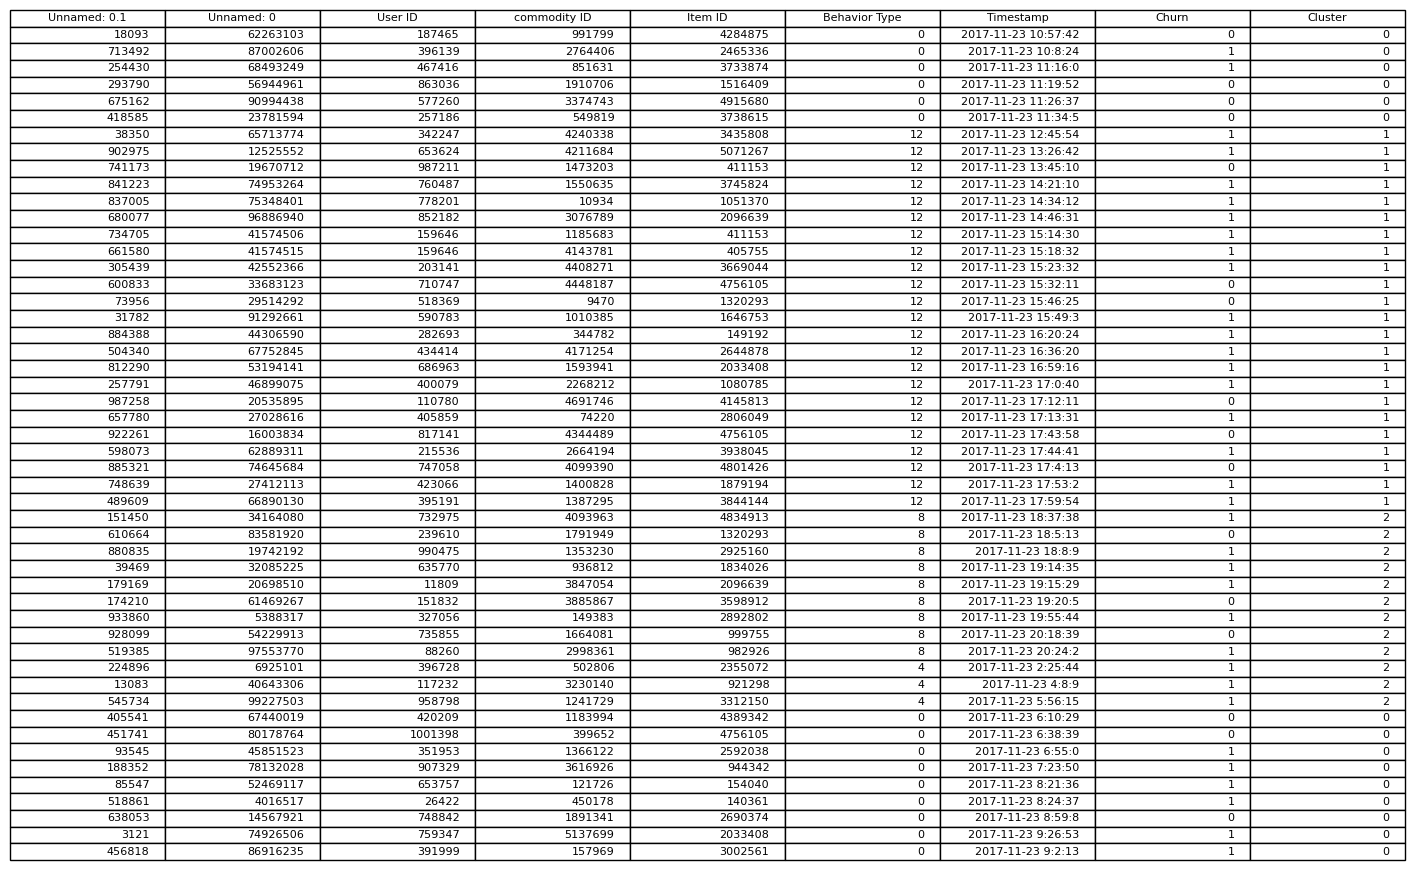

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,10))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=churn_data.head(50).values, colLabels=churn_data.columns, loc='center')
plt.savefig('E:/Time_series_prediction/churn_prediction_project/churn_data.png')


C:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    391061
1    300057
2    296876
Name: Cluster, dtype: int64


In [33]:
Data.head(5) 

,Unnamed: 0,User ID,commodity ID,Item ID,Behavior Type,Timestamp,Cluster
0,43314727,237858,1481482,2733371,8,2017-12-2 18:12:52,2
1,88035904,44200,3916487,4135836,0,2017-11-29 8:29:18,1
2,38200464,920479,1955086,2355072,8,2017-12-3 18:34:56,2
3,83578910,239462,2698818,154040,12,2017-11-27 15:22:19,0
4,78996463,947273,3511372,1029459,0,2017-12-3 7:34:19,1


TypeError: an integer is required (got type str)

AttributeError: 'Series' object has no attribute 'split'

,0
0,1
1,2
2,3


,0
0,1
1,2


,0
0,1
1,2
2,3
